# GRIP TASK-2 : Prediction using Unsupervised ML

# Author : Ankur Tripathi

In [2]:
#importing required 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import datasets

In [3]:
#importing dataset
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data.shape
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#predicting optimum number of clusters by K-Means classification
x=iris_data.iloc[:,[0,1,2,3]].values

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=9)
kmeans.fit(x)

KMeans(n_clusters=9)

In [6]:
y_kmeans=kmeans.predict(x)
y_kmeans

array([8, 0, 0, 0, 8, 3, 0, 8, 0, 0, 8, 8, 0, 0, 3, 3, 3, 8, 3, 8, 8, 8,
       0, 8, 8, 0, 8, 8, 8, 0, 0, 8, 3, 3, 0, 0, 8, 8, 0, 8, 8, 0, 0, 8,
       8, 0, 8, 0, 8, 8, 5, 5, 5, 4, 5, 7, 5, 4, 5, 4, 4, 7, 4, 5, 4, 5,
       7, 7, 1, 4, 1, 7, 1, 5, 5, 5, 5, 5, 7, 4, 4, 4, 7, 1, 7, 5, 5, 5,
       7, 4, 7, 5, 7, 4, 7, 7, 7, 5, 4, 7, 2, 1, 2, 2, 2, 6, 7, 6, 2, 6,
       2, 1, 2, 1, 1, 2, 2, 6, 6, 1, 2, 1, 6, 1, 2, 6, 1, 1, 2, 2, 6, 6,
       2, 1, 1, 6, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

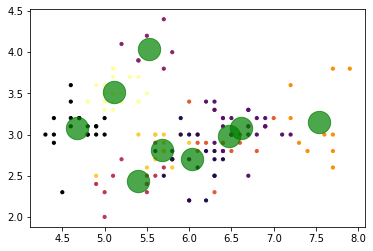

In [7]:
#plotting the dataset for better observation

plt.scatter(x[:,0],x[:,1],  c=y_kmeans, s=10, cmap='inferno')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="green", s=500, alpha=0.7)

Quite clearly and safely we can expect that optimum no of clusters should be 2 or 3. So now we shall take the help of the Elbow method to confirm the suitable number here.

In [8]:
#wihin cluster sum of square error
sse=[]
for k in range (1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

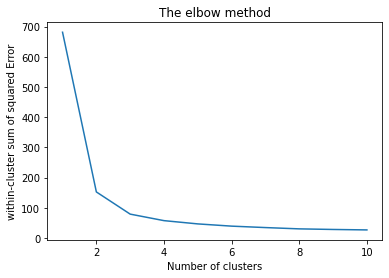

In [9]:
#plotting the results of this method to observe the "Elbow(s)" in a line Graph
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squared Error')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (sse) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as Three.

In [10]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

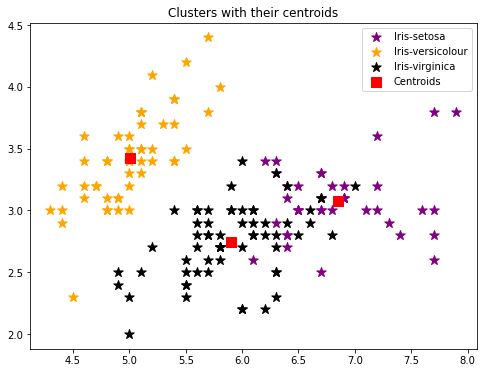

In [11]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, marker='*', c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, marker='*', c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, marker='*', c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100,marker=',', c = 'red', label = 'Centroids')

plt.title('Clusters with their centroids')
plt.legend()

Above Scatter plot is the visual Representation for the given iris Dataset where we can observe that the optimum Number of clusters is 3 for the Data

# Thank You !!!